**Data Set Information:**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

- **Invoice:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter ‘c’, it indicates a cancellation.

- **StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

- **Description:** Product (item) name.

- **Quantity:** The quantities of each product (item) per transaction.

- **InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated.

- **UnitPrice:** Unit price. Numeric. Product price per unit in sterling.

- **CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

- **Country:** Country name. Nominal. The name of the country where a customer resides.

In [157]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import lifetimes

from lifetimes import BetaGeoFitter
from datetime import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


sns.set_style("whitegrid")

In [69]:
# reading the data

data = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"] )



In [70]:
# Separating the sheets

df1 = data["Year 2009-2010"]
df2 = data["Year 2010-2011"]

# Appending one data set to the other

df = df1.append(df2)

temp = df

# we will be working with df, and keep temp as separate in case of emergency

# Seeing the shape of our data

print("The shape of our data is:", df.shape)

df.head()

The shape of our data is: (1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [71]:
# checking the data types of our features

df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [72]:
# checking the missing values we have

print("The no of missing values we have in our data is:\n\n",df.isna().sum()/df.shape[0]*100)

The no of missing values we have in our data is:

 Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64


**Initial Observations**
- The dataset contains 1067371 rows and 8 columns
- The datatypes looks fine and consistent
- There are missing data in description and customer id.
- 22.8% data is missing in Customer ID where as in description we have 0.41% data is missing

### **Data Cleaning**

In [73]:
# Lets go through our missing values and see what we can do about them

df[df["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [74]:
df[df["Description"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


- Looks like wherever we have description as null, we also have customer id as null as well
- I am planning to remove customer ID missing values first as they are a unique ID and imputing them with some random stuff will create a mess. So we would remove it next

In [75]:
# Removing customer id missing values

df.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [76]:
# Again checking the no of missing values

df.isna().sum()/df.shape[0] * 100

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
dtype: float64

- Great!! Looks like removal of Customer ID missing values also removed our missing values from the Description column

In [77]:
# The data description also says that we have some cancelled items where the invoice begins with c. Lets see them

print("The shape of such data is;\n", df[df["Invoice"].str.contains("C") == True].shape)

df[df["Invoice"].str.contains("C") == True]

The shape of such data is;
 (18744, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


- So we have 18744 rows where items were cancelled

In [78]:
# Lets get the index of those rows... where invoice starts with C ie cancelled items

index_names = df[df["Invoice"].str.contains("C") == True].index

In [79]:
# Lets now drop those rows from our data

df.drop(index_names, inplace=True)

In [80]:
# Lets look at our new shape of our data

print("The new shape of our data is:", df.shape)

The new shape of our data is: (791559, 8)


### **Exploratory Data Analysis**

In [81]:
# Time to explore our data now

# Lets start with seeing country who have the highest no of customers

df_customers = pd.DataFrame(df.groupby('Country')["Customer ID"].count()).reset_index()

df_customers

# Lets plot it to get the gist visually...going through tables is tough

fig = px.bar(df_customers, x = "Country", y = "Customer ID", color = "Country").update_xaxes(categoryorder = "total descending")
#fig.update_layout (autosize = False, width = 700, height = 400)



fig.show()

#### **Observations**
- We have the highest customers from United Kingdom
- Also the no. of customers from the UK is so high that other data is not visible, kind of imbalanced

In [82]:
# Removing UK and seeing the rest of the data

df_customers = df_customers.sort_values("Customer ID", ascending = False)
df_rest = df_customers.iloc[1:,:]


# Plotting the graph again

fig = px.bar(df_rest, x= "Country", y = "Customer ID", color = "Country")

#fig.update_layout (autosize = False, width = 700, height = 400)

fig.show()


- As you can see , data from UK was so dominating that other data from other countries was not visible

In [83]:
# Lets see the average price in each country

df_avg_price = df.groupby(["Country"])["Price"].mean().reset_index().rename(columns={"Price":"Avg_Price"}).sort_values("Avg_Price", ascending=False)


# Plotting the above data

fig = px.bar(df_avg_price, x= "Country", y = "Avg_Price", color = "Country")


fig.show()


#### **Observations**

- We have the highest avg price in **Singapore** followes by **Norway** and **Malta**
- The price of a giftware in Australia is 39.73 on an average

In [84]:
# We will now move on to see the maximum no of quantites bought by which country - Lets group the countries again by quantity sum

df_total_gifts = df.groupby(["Country"])["Quantity"].sum().reset_index().rename(columns = {"Quantity":"Total_quantities"})


# plotting the above data to visualise 

fig = px.bar(df_total_gifts, x = "Country", y = "Total_quantities", color = "Country").update_xaxes(categoryorder = "total descending")
#ig.update_layout (autosize = False, width = 700, height = 400)

fig.show()


### **Observations**
- The maximum number of quantites of products came from the customers of **United Kingdom** with about 8M quantities in total
- The least quantities came from **Nigeria** and thats just 28 in number

In [85]:
# Unique Invoices we have 

df["Invoice"].nunique()

36820

- We have 36820 unique transactions in our data

In [86]:
df["Customer ID"].nunique()

5875

- We have 5875 unique customers and 36820 unique transactions
- That means there are customers who brought items more than once, we will later find out the repeat rate

In [87]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [88]:
# removing the time portion from the InvoiceDate column

df["InvoiceDate"] = df["InvoiceDate"].dt.date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [89]:
# We will make new columns for day, month, year and total price

df["day"] = df["InvoiceDate"].dt.day
df["month"] = df["InvoiceDate"].dt.month
df["year"] = df["InvoiceDate"].dt.year

In [90]:
df["Total price"] = df["Quantity"] * df["Price"]

Text(0, 0.5, 'Income of the store in that year')

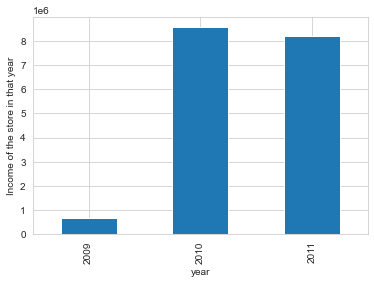

In [91]:
# Lets first see the total price by year

df_price_year = df.groupby(["year"])["Total price"].sum().reset_index()

df.groupby(["year"])["Total price"].sum().plot(kind = "bar")
plt.xlabel("year")
plt.ylabel("Income of the store in that year")

In [92]:
fig = px.bar(df_price_year, x = "year", y = "Total price")
fig.update_layout (autosize = False, width = 500, height = 400)

fig.show()



### **Observation**
- The store had the least purchase of 669k in the year 2009. we will delve into deeper fro the reason later.
- The store saw the highest amount of revenue about **8.5 million in the year 2010**.
- Year 2011 again showed a decrease in the revenue by **-4.32%**

In [93]:
df_price_month = df.groupby(["month"])["Total price"].sum().reset_index()

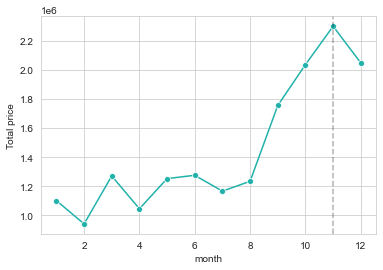

In [94]:
# Lets see the revenue of the store by month

sns.lineplot(x = "month", y = "Total price", data = df_price_month, marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)

### **Observations**
- November saw the highest tranactions among the 3 years

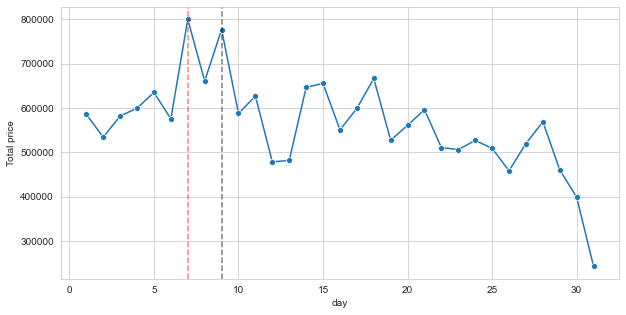

In [95]:
# Also we will see the total income of the store by day

df_price_day = df.groupby(["day"])["Total price"].sum().reset_index()

# Lets plot it and see the pattern in it

plt.figure(figsize=(10,5))
sns.lineplot(x = "day", y = "Total price", data = df_price_day, marker = "o")
plt.axvline(7, color = "r" , linestyle = "--", alpha = 0.5)
plt.axvline(9, color = "k", linestyle = "--", alpha = 0.5)

### **Observations**

- Before 15th, people like to purchase stuff on the the **7th and 9th day of the month.**
- Also people like to buy stuff from the store on the **18th day in the second half of the month**

In [96]:
# We can also check the transactions by quarter and by week

df["quarter"] = df["InvoiceDate"].dt.quarter
df["dayofweek"] = df["InvoiceDate"].dt.dayofweek


In [97]:
mapping_day = dict({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})

df["dayofweek"] = df["dayofweek"].map(mapping_day)

Text(0.5, 0.98, 'Total transactions in each quarter')

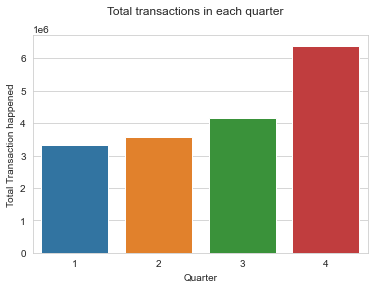

In [98]:
# lets check the transactions by quarter

df_quarter = df.groupby(["quarter"])["Total price"].sum().reset_index()
sns.barplot(data = df_quarter, x = "quarter", y = "Total price")
plt.xlabel("Quarter")
plt.ylabel("Total Transaction happened")
plt.suptitle("Total transactions in each quarter")




**Observations**
- Maximum amount of transactions is seen in the quarter 4
- But we did not separate it by year, so lets do this next

<AxesSubplot:xlabel='quarter', ylabel='Total price'>

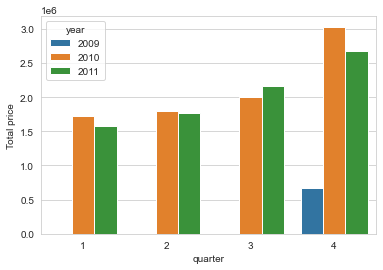

In [99]:
# Grouping quarters by year and seeing the total tranaction in each year by each quarter

df_quarter_byyear = df.groupby(["quarter","year"])["Total price"].sum().reset_index()

df_quarter_byyear["Total price"] = np.round(df_quarter_byyear["Total price"],2)

sns.barplot(data = df_quarter_byyear, x = "quarter", y = "Total price", hue = "year")

In [100]:
# Grouping quarters by year and seeing the total tranaction in each year by each quarter

df_quarter_byyear = df.groupby(["quarter","year"])["Total price"].sum().reset_index()

df_quarter_byyear["Total price"] = np.round(df_quarter_byyear["Total price"],2)

fig = px.bar(df_quarter_byyear, x = "year", y = "Total price", color = "quarter", text = "Total price")

fig.update_layout (autosize = False, width = 500, height = 400)

fig.show()


### **Observations**

- In 2009 we had transactions of **approx 670k only in the last quarter**. There might be many reasosn for it. But one possible reson can be that the store didnt exist before that.
- In **2010**, the highest transactions was seen in **quarter 4 itself**. About **3M worth purchase has been done in the 4th quarter**
- In 2011 as well, the highest transactions was seen in quarter 4 itself. But there is a **downfall of approcximately  11.62 % in the transaction** done from this store itself than what was seen in the last quarter of 2010
- In every quarter 2010 had higher sales except in quarter 3. In **2011, the quarter 3 sales improved and were higher by 8.11% than quarter 3 of 2010**

<AxesSubplot:xlabel='dayofweek', ylabel='Total price'>

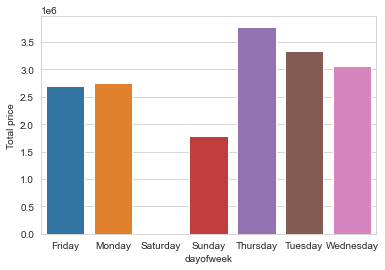

In [101]:
# Finally let see which day of the week showed more purchases overall

df_dayofweek = df.groupby(["dayofweek"])["Total price"].sum().reset_index()

sns.barplot(data= df_dayofweek, x = "dayofweek", y = "Total price")

In [102]:
fig = px.bar(df_dayofweek, x = "dayofweek", y = "Total price").update_xaxes(categoryorder = "total descending")
fig.update_layout (autosize = False, width = 700, height = 400)

fig.show()


### **Observation**
- Thats really interesting, **there is so less purchase on saturdays**. Only 9680 purchases has been done in 3years on saturdays.
- **Thursday** shows most purchases from the shop than any other day of the week about 3.77M

<AxesSubplot:xlabel='dayofweek', ylabel='Total price'>

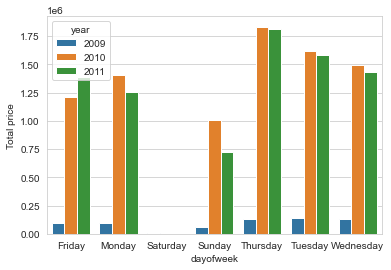

In [103]:
# Lets group by year and see the same

df_day_year = df.groupby(["dayofweek","year"])["Total price"].sum().reset_index()

sns.barplot(data = df_day_year, x = "dayofweek", y = "Total price", hue= "year")

### **More EDA**

In [104]:
# Lets see first of all why there were so less transactions in 2009

print("The total no countries in which stores were present in 2009:",len(df[df["year"] == 2009]["Country"].unique()))
print("The total amount of things purchased from the stores in 2009:",df[df["year"] == 2009]["Quantity"].sum())
print("The total number of tranactions we had in 2009:", df[df["year"] == 2009]["Invoice"].count())
print("----------------------------------------------------------------------------------------------------")


print("The total no countries in which stores were present in 2010:",len(df[df["year"] == 2010]["Country"].unique()))
print("The total amount of things purchased from the stores in 2010:",df[df["year"] == 2010]["Quantity"].sum())
print("The total number of tranactions we had in 2010:", df[df["year"] == 2010]["Invoice"].count())
print("----------------------------------------------------------------------------------------------------")


print("The total no countries in which stores were present in 2011:",len(df[df["year"] == 2011]["Country"].unique()))
print("The total amount of things purchased from the stores in 2011:",df[df["year"] == 2011]["Quantity"].sum())
print("The total number of tranactions we had in 2011:", df[df["year"] == 2011]["Invoice"].count())
print("----------------------------------------------------------------------------------------------------")



The total no countries in which stores were present in 2009: 22
The total amount of things purchased from the stores in 2009: 391160
The total number of tranactions we had in 2009: 30184
----------------------------------------------------------------------------------------------------
The total no countries in which stores were present in 2010: 37
The total amount of things purchased from the stores in 2010: 5359702
The total number of tranactions we had in 2010: 396283
----------------------------------------------------------------------------------------------------
The total no countries in which stores were present in 2011: 36
The total amount of things purchased from the stores in 2011: 4782201
The total number of tranactions we had in 2011: 365092
----------------------------------------------------------------------------------------------------


### **Observations**
- From the above analysis we can see that, no of **countries where store were present were least in 2009** which becomes the perfect reason for less sales in 2009
- However, **in 2010**, the store expanded to several countries, and as a result purchases or sales from the stores **increased tremendously by 1270 %**
- Moreover, as you can remember **2011 showed a slight decrease** in purchases in every quarter when compared to 2010. The reason being a store was closed from one of the countries and **as a result sales decreased by 10.7 %**

In [105]:
# Lets see the countries in which stores were present in 2010 and 2011 but not in 2009

countries_2009 = list(df[df["year"] == 2009]["Country"].unique())
countries_2010 = list(df[df["year"] == 2010]["Country"].unique())
countries_2011 = list(df[df["year"] == 2011]["Country"].unique())

country_not2009 = []

for i in countries_2010:

    if i not in countries_2009:

        country_not2009.append(i)


print("The countries where the stores were not present in 2009 are:\n", country_not2009)
print("---------------------------------------------------------------------------------------------")
# Also lets see which is the one country where the store was closed in 2011

for i in countries_2010:
    if i not in countries_2011:
        a = i

print("The country where the stored was closed in 2011 is:", a)

The countries where the stores were not present in 2009 are:
 ['Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']
---------------------------------------------------------------------------------------------
The country where the stored was closed in 2011 is: Korea


### **Observations**
- The locations where the stores were not present in 2009 were **Japan, Nigeria, Malta, RSA, Singapore, Bahrain, Thailand, Israel, Lithuania, West Indies, Korea, Brazil, Canada, Iceland**
- In 2011, the store **in Korea was shut down** which resulted in a slight decrease in sales.

In [106]:
# Lets explore the various products we have

df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5084
REGENCY CAKESTAND 3 TIER              3375
ASSORTED COLOUR BIRD ORNAMENT         2732
JUMBO BAG RED RETROSPOT               2650
REX CASH+CARRY JUMBO SHOPPER          2105
                                      ... 
DOTCOMGIFTSHOP TEA TOWEL                 1
WHITE SILVER NECKLACE SHELL GLASS        1
CRACKED GLAZE EARRINGS BROWN             1
ENGLISH ROSE DESIGN SHOPPING BAG         1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 5281, dtype: int64

In [107]:
# Grouping products by countries and sum of quantities bought of each kind

df_desc = df.groupby(["Country","Description"])["Quantity"].sum().reset_index()

df_desc.head()

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS SMALL TUBE RED SPOTTY,24


In [108]:
# Getting the top 10 countries which sold high number of products

countries_df = df.groupby(["Country"])["Quantity"].sum().reset_index().sort_values("Quantity", ascending = False).head(10)

countries_top10 = list(countries_df["Country"])

countries_top10

['United Kingdom',
 'Netherlands',
 'EIRE',
 'France',
 'Denmark',
 'Germany',
 'Australia',
 'Sweden',
 'Switzerland',
 'Spain']

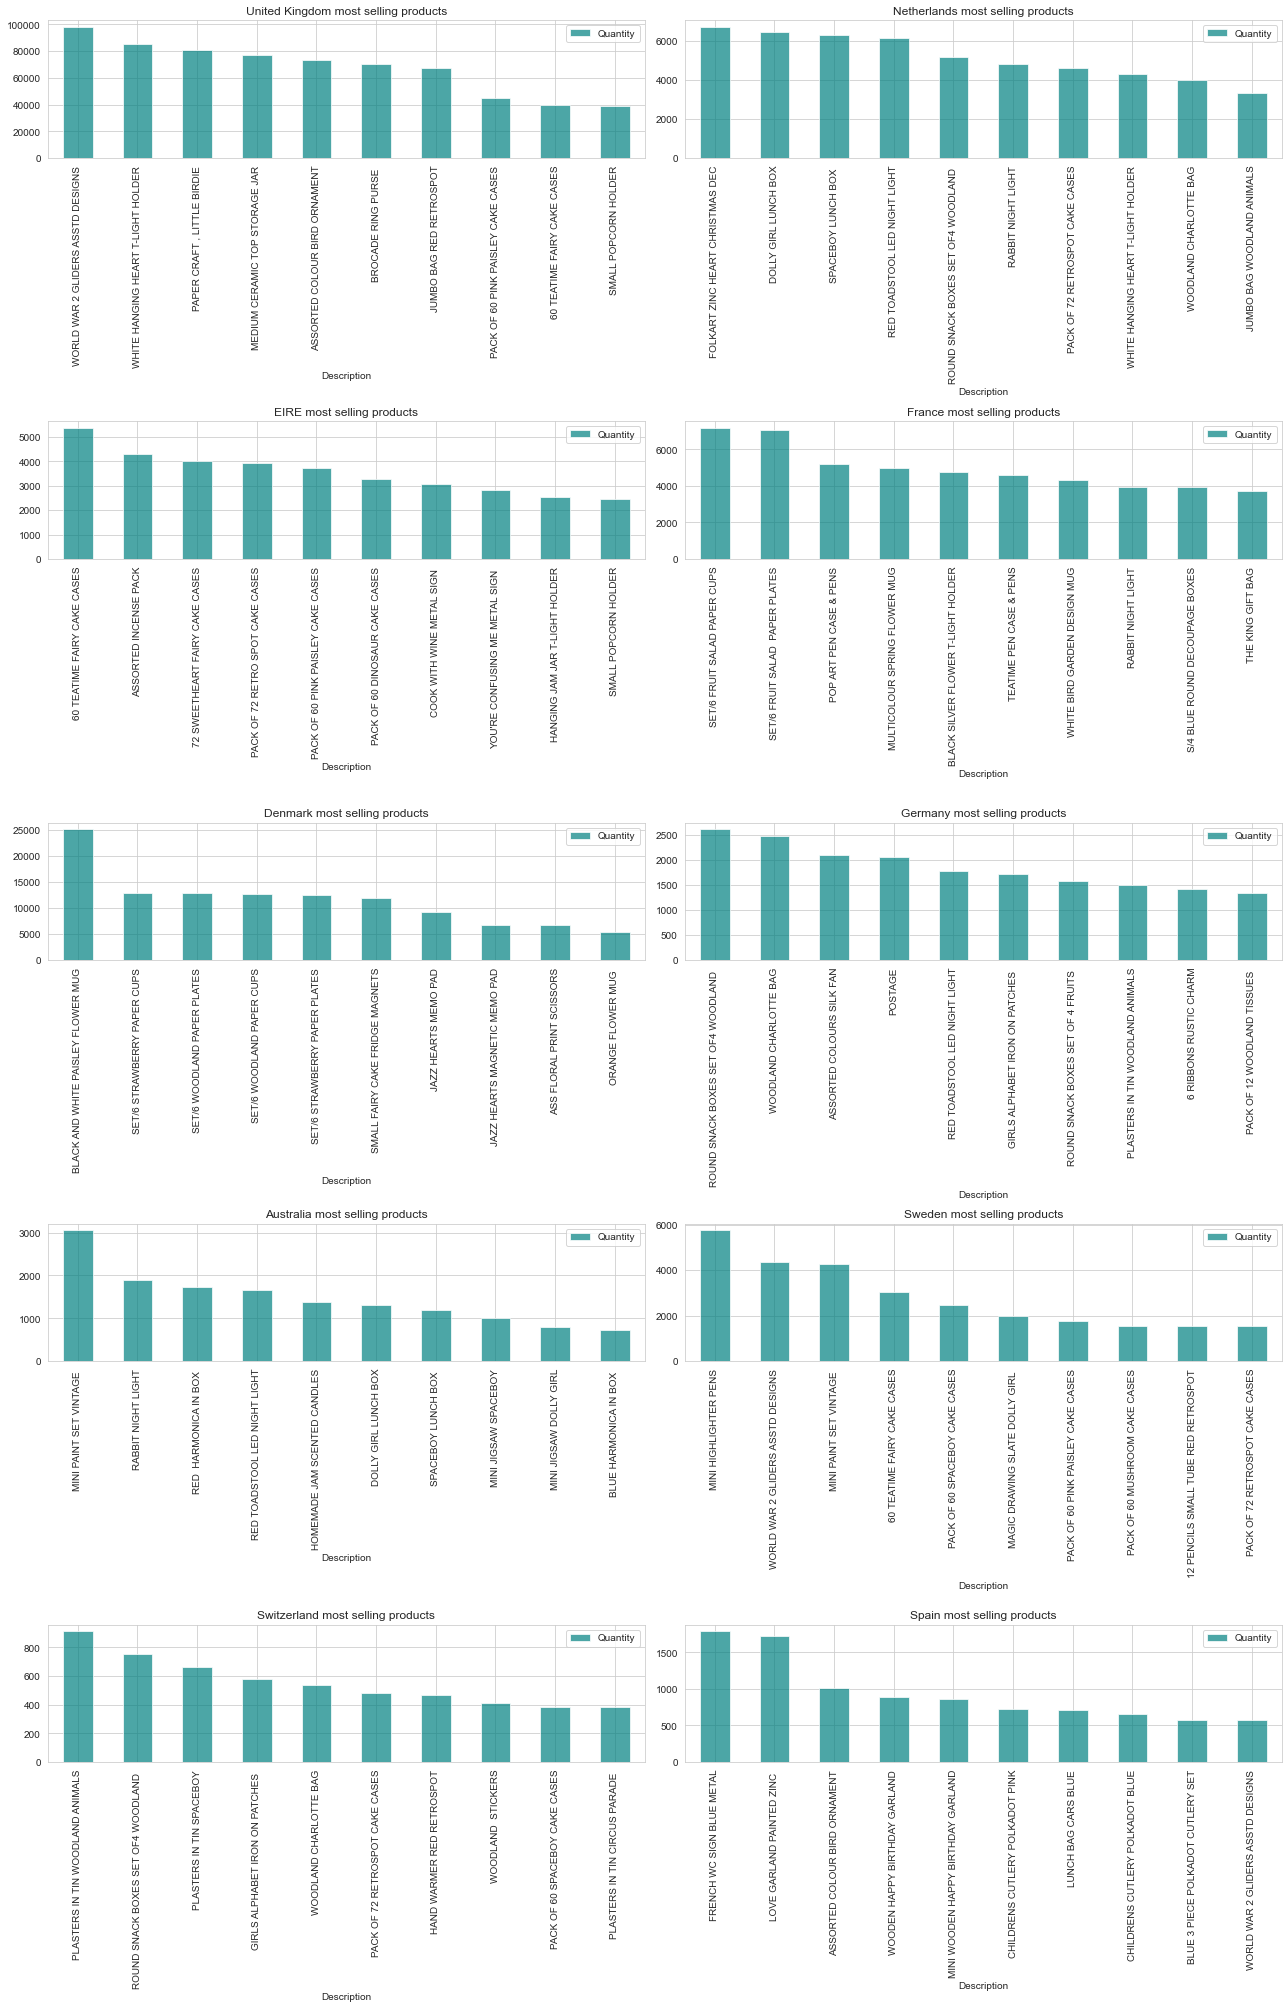

In [109]:
#df_n = df_desc[df_desc["Country"] == "Netherlands"]

# Plotting the top 10 most selling products of the top 10 countries

x = 0

axes = plt.subplots(5, 2)



for i in range(len(countries_top10)):


    axes1 = plt.subplot(5, 2, x + 1)


    df_desc[df_desc["Country"] == countries_top10[i]].sort_values("Quantity", ascending = False).head(10).plot(kind = "bar", 
                                                                   x = "Description", figsize = (18, 28), color = "teal", ax = axes1, alpha = 0.7)
    plt.title(countries_top10[i] + ' ' + "most selling products")
    x += 1

    plt.tight_layout()




In [110]:
# making a list of bottom 10 countries

countries_bottom10 = df.groupby(["Country"])["Quantity"].sum().reset_index().sort_values("Quantity", ascending = True).head(10)

countries_bottom10 = list(countries_bottom10["Country"])

countries_bottom10

['Nigeria',
 'Saudi Arabia',
 'Lebanon',
 'West Indies',
 'European Community',
 'Brazil',
 'Czech Republic',
 'Bahrain',
 'Korea',
 'RSA']

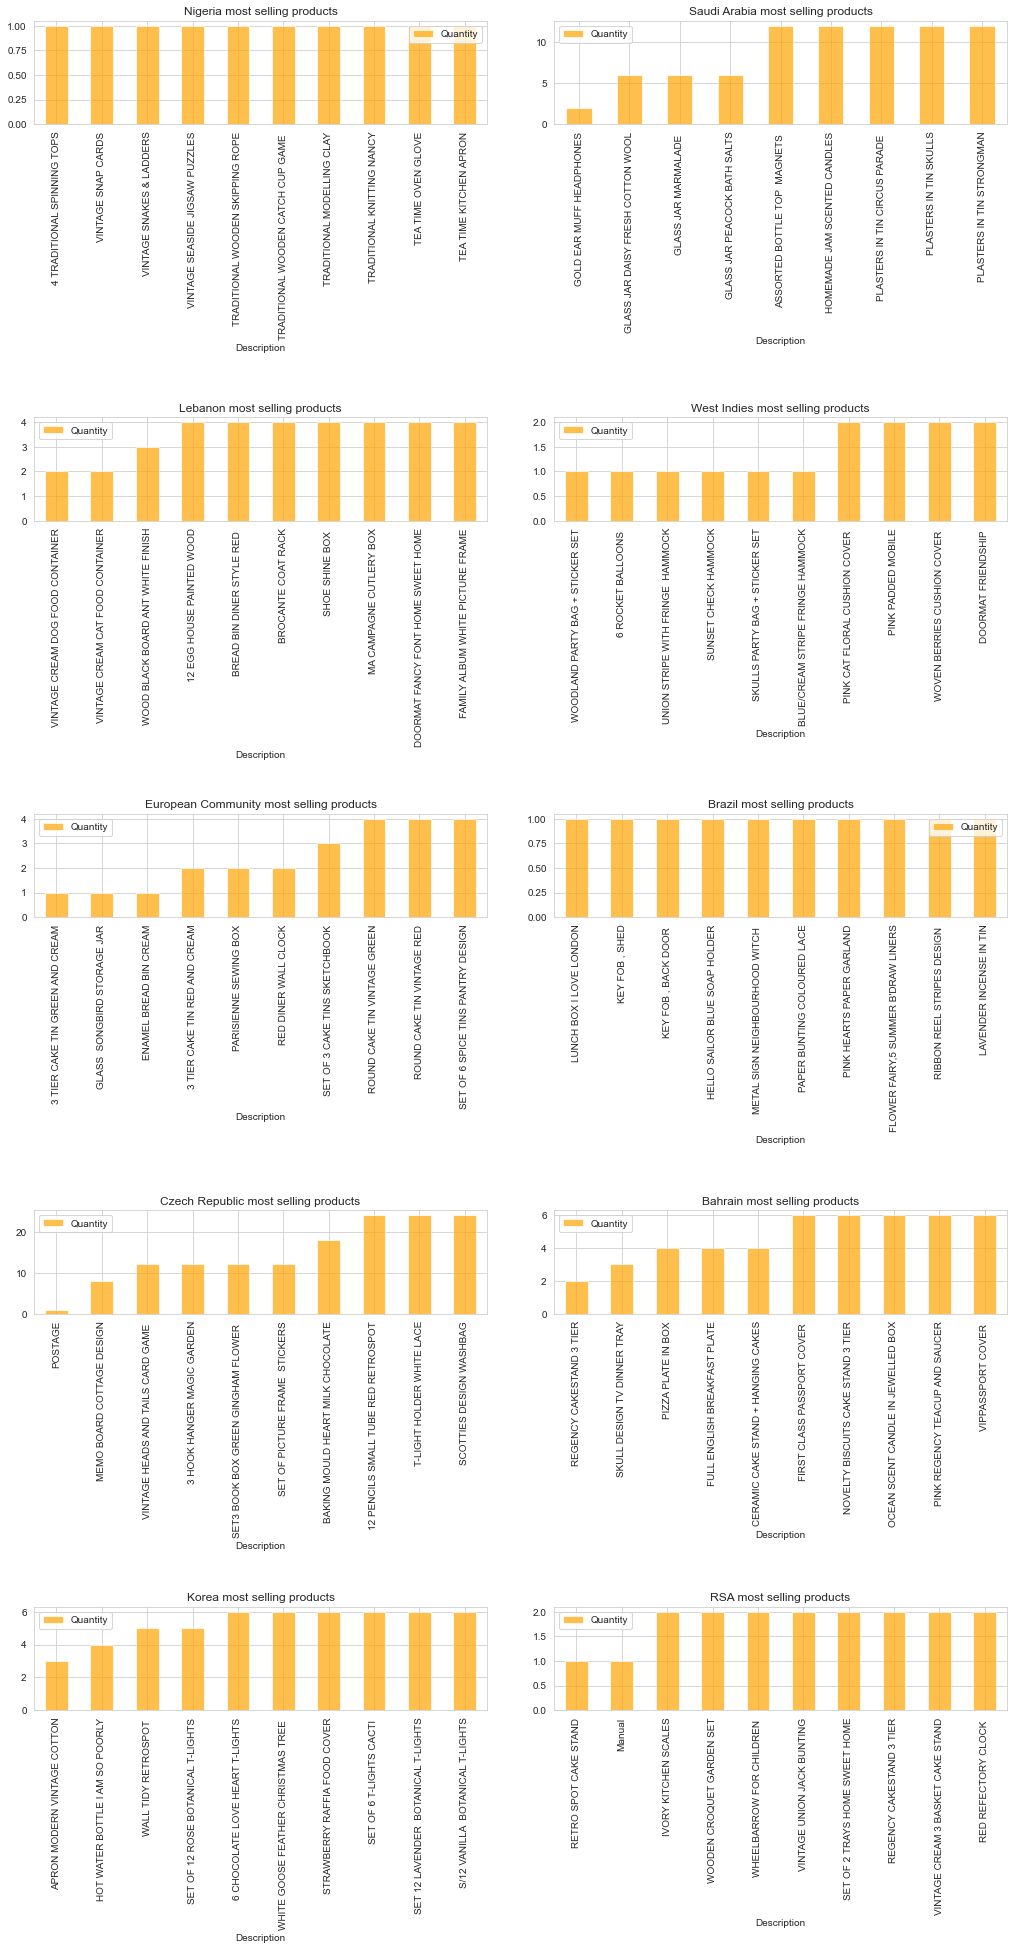

In [111]:
# Plotting the top 10 selling products of the bottom 8 countries

x = 0

axes = plt.subplots(5, 2)



for i in range(len(countries_bottom10)):


    axes1 = plt.subplot(5, 2, x + 1)


    df_desc[df_desc["Country"] == countries_bottom10[i]].sort_values("Quantity", ascending = True).head(10).plot(kind = "bar", 
                                                                   x = "Description", figsize = (15, 28), color = "orange", ax = axes1, alpha = 0.7)
    plt.title(countries_bottom10[i] + ' ' + "most selling products")
    x += 1

    plt.tight_layout(pad = 4)


In [112]:
df.to_csv("retail.csv")

### **RFM Estimation(Recency, Frequency, Monetary)**

In [113]:
# Lets load and read our data again

data = pd.read_csv("retail.csv")

print("The shape of our data is:",data.shape)

data.head()

The shape of our data is: (791559, 15)


,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,day,month,year,Total price,quarter,dayofweek
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,1,12,2009,83.4,4,Tuesday
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,1,12,2009,81.0,4,Tuesday
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,1,12,2009,81.0,4,Tuesday
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,1,12,2009,100.8,4,Tuesday
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,1,12,2009,30.0,4,Tuesday


In [114]:
# Lets see for duplicate entries

data[data.duplicated()]

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,day,month,year,Total price,quarter,dayofweek


### **RFM Estimation**

In [115]:
data.drop(columns=["Unnamed: 0"], inplace = True)

In [116]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,day,month,year,Total price,quarter,dayofweek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,1,12,2009,83.4,4,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,1,12,2009,81.0,4,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,1,12,2009,81.0,4,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,1,12,2009,100.8,4,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,1,12,2009,30.0,4,Tuesday


In [117]:
rfm = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total price")
rfm = rfm.reset_index()

In [118]:
rfm

,Customer ID,frequency,recency,T,monetary_value
0,12346.0,7.0,400.0,725.0,11066.637143
1,12347.0,7.0,402.0,404.0,692.427143
2,12348.0,4.0,363.0,438.0,439.310000
3,12349.0,3.0,571.0,589.0,1104.096667
4,12350.0,0.0,0.0,310.0,0.000000
...,...,...,...,...,...
5870,18283.0,18.0,655.0,658.0,143.666111
5871,18284.0,0.0,0.0,431.0,0.000000
5872,18285.0,0.0,0.0,660.0,0.000000
5873,18286.0,1.0,247.0,723.0,833.480000


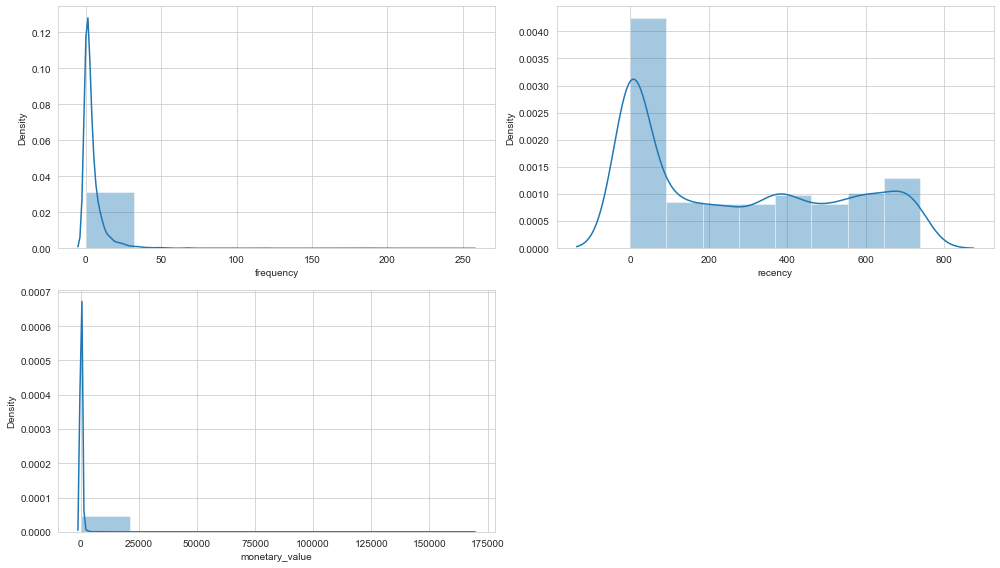

In [173]:
# Lets plot the distribution of rfm

plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm["frequency"], bins = 8)
plt.subplot(222)
sns.distplot(rfm["recency"], bins = 8)
plt.subplot(223)
sns.distplot(rfm["monetary_value"], bins = 8)

plt.tight_layout()


In [179]:
# Using plotly to understand the numbers better

fig = px.histogram(data_frame=rfm, x = "monetary_value")

fig.update_traces(xbins_start=0)
fig.show()

**Observations**
- Customers spend is mostly within **200 sterling**. This might be because they are buying more accesories which we generally buy regularly
- There are only single customers who purchased above 4000 sterling.

In [182]:
data[data["Total price"] > 4000]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,day,month,year,Total price,quarter,dayofweek
49633,496115,M,Manual,1,2010-01-29,8985.60,17949.0,United Kingdom,29,1,2010,8985.60,1,Friday
92471,501766,M,Manual,1,2010-03-19,6958.17,15760.0,Norway,19,3,2010,6958.17,1,Friday
92555,501768,M,Manual,1,2010-03-19,6958.17,15760.0,Norway,19,3,2010,6958.17,1,Friday
96605,502263,M,Manual,1,2010-03-23,10953.50,12918.0,United Kingdom,23,3,2010,10953.50,1,Tuesday
169469,511465,15044A,PINK PAPER PARASOL,3500,2010-06-08,2.55,18008.0,United Kingdom,8,6,2010,8925.00,2,Tuesday
272698,524159,M,Manual,1,2010-09-27,10468.80,14063.0,United Kingdom,27,9,2010,10468.80,3,Monday
272868,524181,21622,VINTAGE UNION JACK CUSHION COVER,648,2010-09-27,6.89,17450.0,United Kingdom,27,9,2010,4464.72,3,Monday
290016,525968,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,3120,2010-10-08,1.66,15838.0,United Kingdom,8,10,2010,5179.20,4,Friday
332279,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04,1.69,15838.0,United Kingdom,4,11,2010,15818.40,4,Thursday
348232,532358,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2010-11-11,1.45,12931.0,United Kingdom,11,11,2010,4176.00,4,Thursday


- From the above data, its evident that, maximum customers who bought above 4000 sterling bought the items in bulk

In [183]:
# visualizing recency

fig = px.histogram(data_frame=rfm, x = "recency")
fig.update_traces(xbins_start = 0)
fig.show()

**Observations**
- Customers who bought items from the store, approximately within the **last 1 month** are high. 

In [185]:
# lets look at the frequency plot

fig = px.histogram(data_frame=rfm, x = "frequency")
fig.update_traces(xbins_start = 1)
fig.show()

**Observations**
- Customers who orders **1 time from our store is the highest**
- Customer who buy 2 time are more than customer who orders 3 times from our shop. Its more by **32.02%**
- The number of customers is seen to be decreaseing with the increase in frequency. However we have **less number of customers who buys more than 10 times** from our store

- Since independently they wont give much of the insights, lets do a bivariate analysis of recency, frequency and monetary value 

In [190]:
# Recency vs Frequency

px.scatter(data_frame=rfm, x = "recency", y = "frequency", color="frequency")

**Observations**
- Customers whose recency is more have more frequency in buying ie, customers buying more, when their recency is more

In [194]:
# Frequency vs Monetary_value

px.scatter(data_frame=rfm, x = "frequency", y = "monetary_value", color="monetary_value")

**Observations**
- There is no evident relationship between frequency and monetary value among the customers
- We can see that with increase in frequency of buying the monetary value is usually decreasing 
- There are some customers who bought 253 times from the same store but has a less monetary value